# Proyecto ANS

## Sismicidad en Colombia

## Importación de librerias

In [ ]:
!pip install scikit-learn-extra

In [ ]:
!pip install contextily

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Datos

In [ ]:
# URL directa al archivo CSV en GitHub
BD_sismos_col = "https://raw.githubusercontent.com/ikteran/Proyecto-ANS---Clustering-sismos/main/Sismicidad_superficial.csv"

# Cargar el archivo CSV desde GitHub
data = pd.read_csv(BD_sismos_col)
data = data.rename(columns={'LATITUD º':'LATITUD', 'LONGITUD º': 'LONGITUD', 'FECHA ': 'FECHA', 'PROFUNDIDAD (km)': 'PROFUNDIDAD'})

data['FECHA'] = pd.to_datetime(data['FECHA'])

# Mostrar las primeras filas del DataFrame para verificar la carga
data.head()

,FECHA,HORA UTC,LATITUD,LONGITUD,PROFUNDIDAD,MAGNITUD,EPICENTRO,RMS,GAP,ERROR-LAT,ERROR-LON,ERROR-Z
0,1993-06-03,01:10:40,4.532,-74.935,6.0,2.4,ALVARADO - TOLIMA,0.8,93.0,4.6,6.0,26.1
1,1993-06-03,02:10:46,3.453,-74.701,6.8,2.0,COLOMBIA - HUILA,0.4,166.0,8.4,10.7,23.2
2,1993-06-03,03:22:05,2.236,-75.603,6.0,2.7,GARZÓN - HUILA,0.5,144.0,4.1,6.0,10.7
3,1993-06-03,08:17:11,1.764,-76.145,0.0,2.2,PALESTINA - HUILA,1.3,126.0,11.2,6.5,22.6
4,1993-06-03,13:36:13,2.403,-75.432,15.0,2.1,GIGANTE - HUILA,0.4,170.0,60.6,89.6,54.0


### Valores nulos

In [ ]:
# Contar NaN
data.isna().sum()

,0
FECHA,0
HORA UTC,0
LATITUD,0
LONGITUD,0
PROFUNDIDAD,0
MAGNITUD,0
EPICENTRO,0
RMS,0
GAP,0
ERROR-LAT,0


### Estadísticas descriptivas

In [ ]:
data.describe()

,FECHA,LATITUD,LONGITUD,PROFUNDIDAD,MAGNITUD,RMS,GAP,ERROR-LAT,ERROR-LON,ERROR-Z
count,96177,96177.000000,96177.000000,96177.000000,96177.000000,96177.000000,96177.000000,96177.000000,96177.000000,96177.000000
mean,2016-03-17 19:53:52.128263424,5.278412,-75.171188,9.872022,1.818032,1.618084,163.435997,5.094376,5.796056,8.311757
min,1993-06-03 00:00:00,-3.483000,-85.633000,-4.971000,-1.300000,0.000000,17.800000,0.000000,0.000000,0.000000
25%,2013-04-30 00:00:00,3.434000,-76.255000,1.800000,1.300000,0.400000,116.000000,1.838478,1.848134,3.400000
50%,2018-08-11 00:00:00,5.128000,-75.124000,7.100000,1.700000,0.500000,156.000000,3.040559,3.200000,5.579915
75%,2021-04-06 00:00:00,6.922000,-74.093000,17.200000,2.200000,0.700000,206.000000,5.020458,5.900000,8.600000
max,2024-06-30 00:00:00,14.735000,-70.010000,30.000000,6.700000,999.000000,357.000000,99.800000,99.800000,99.800000
std,NaN,2.413719,1.757632,9.078527,0.705622,32.339725,62.383332,8.113271,9.151191,10.571160


### Histogramas para las distribuciones de las variables

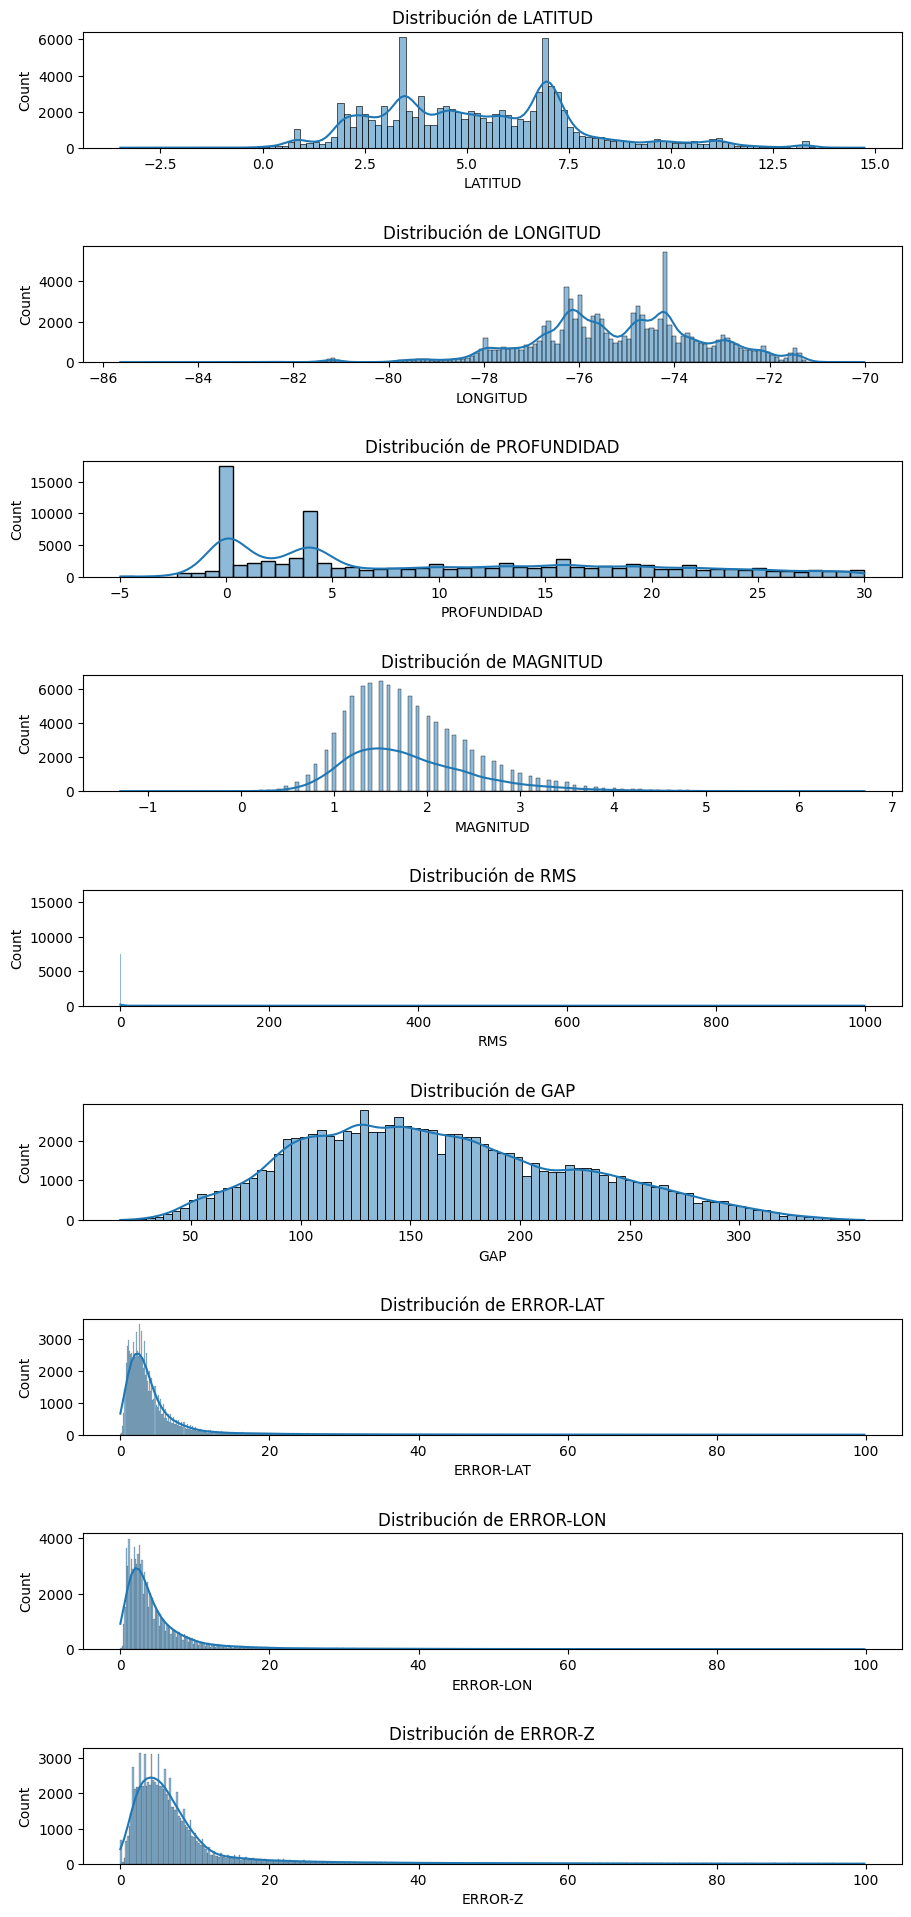

In [ ]:
# Variables a graficar
variables = ['LATITUD', 'LONGITUD', 'PROFUNDIDAD', 'MAGNITUD', 'RMS', 'GAP', 'ERROR-LAT', 'ERROR-LON', 'ERROR-Z']

# Crear subplots
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 20))
fig.tight_layout(pad=5.0)

# Graficar cada variable
for i, var in enumerate(variables):
    sns.histplot(data[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {var}')
    axes[i].set_xlabel(var)

plt.show()

### Gráfico de Dispersión entre Magnitud y Profundidad

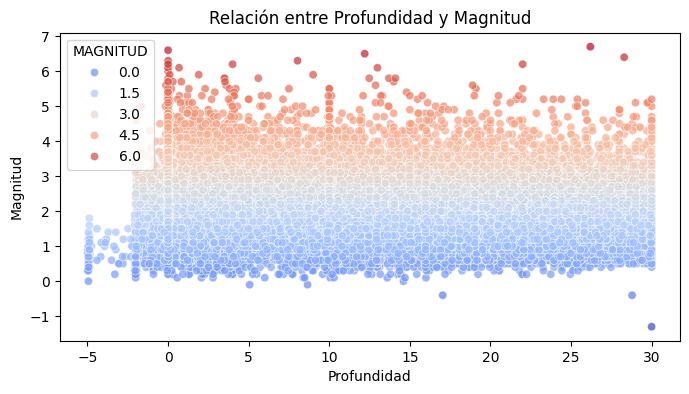

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='PROFUNDIDAD', y='MAGNITUD', data=data, hue='MAGNITUD', palette='coolwarm', alpha=0.7)
plt.title('Relación entre Profundidad y Magnitud')
plt.xlabel('Profundidad')
plt.ylabel('Magnitud')
plt.show()

### Mapa de Calor de la Correlación entre Variables


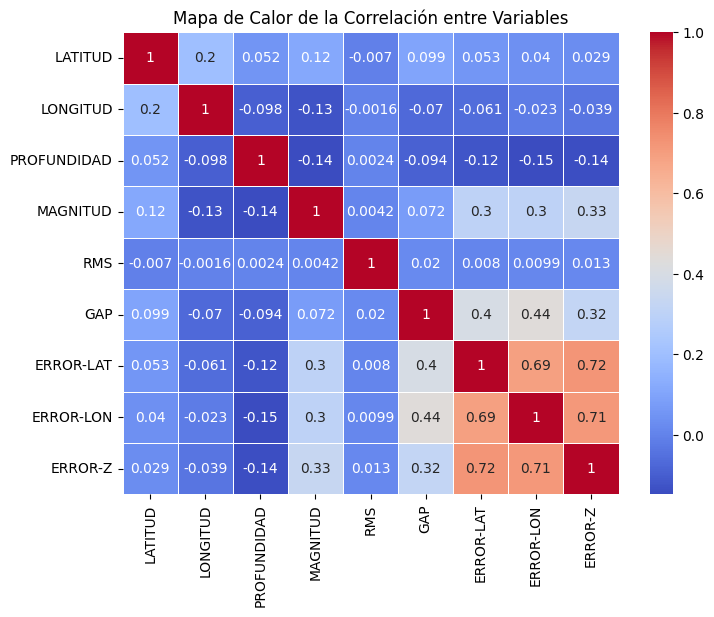

In [ ]:
plt.figure(figsize=(8, 6))
correlation_matrix = data[variables].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Correlación entre Variables')
plt.show()

### Gráfico de Líneas de la Distribución Temporal

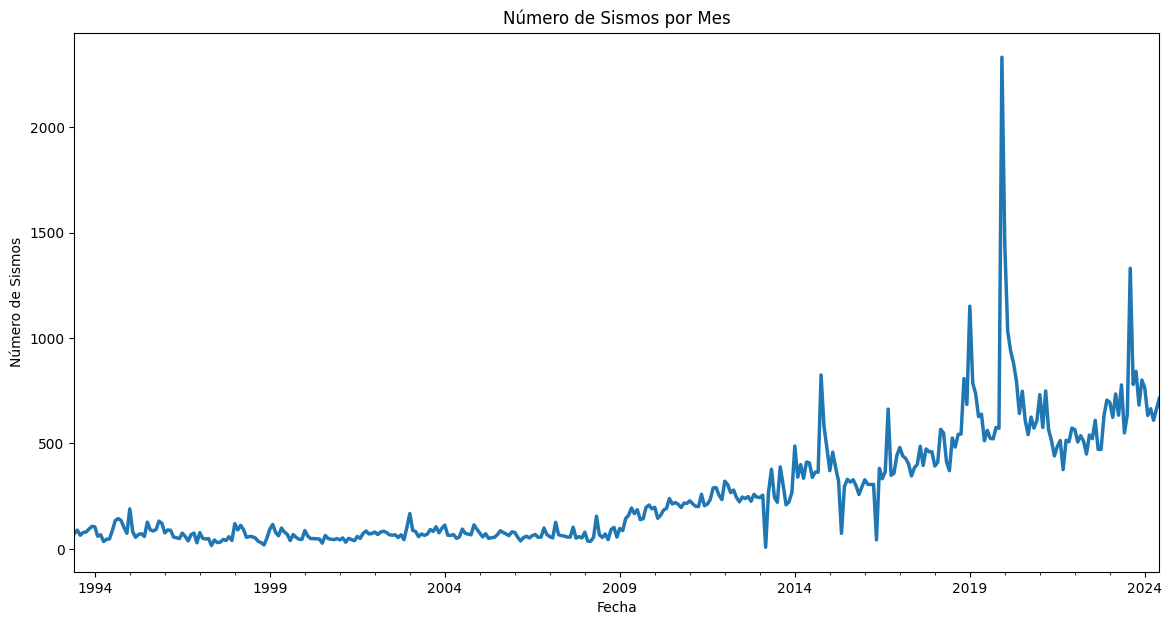

In [ ]:
plt.figure(figsize=(14, 7))

data.set_index('FECHA', inplace=True)
data['MAGNITUD'].resample('M').count().plot(linewidth=2.5)
plt.title('Número de Sismos por Mes')
plt.xlabel('Fecha')
plt.ylabel('Número de Sismos')
plt.show()

# Filtros

In [ ]:
#latitud_minima = -3
#latitud_maxima = 12
#longitud_minima = -66
#longitud_maxima = -80

ini_data = '2019-01-01'
val_RMS = 0.7
val_GAP = 300
Ehz_max = 20
Evert_max = 20

In [ ]:
data.columns

Index(['FECHA', 'HORA UTC', 'LATITUD', 'LONGITUD', 'PROFUNDIDAD', 'MAGNITUD',
       'EPICENTRO', 'RMS', 'GAP', 'ERROR-LAT', 'ERROR-LON', 'ERROR-Z'],
      dtype='object')

In [ ]:
data['PROFUNDIDAD'] = data['PROFUNDIDAD']*-1
data_flt = data[
          # (data['LATITUD'] >= latitud_minima) & (data['LATITUD'] <= latitud_maxima) & \
          # (data['LONGITUD'] >= longitud_minima) & (data['LONGITUD'] <= longitud_maxima) & \
          # (data['MAGNITUD'] > 2.0) & \
          (data['FECHA'] > ini_data) & \
           (data['GAP'] <= val_GAP) &
          (data['RMS'] <= val_RMS) & \
          (data['ERROR-Z'] <= Evert_max) & \
          (data['ERROR-LAT'] <= Ehz_max) & \
          (data['ERROR-LON'] <= Ehz_max)
          ]
data_flt

,FECHA,HORA UTC,LATITUD,LONGITUD,PROFUNDIDAD,MAGNITUD,EPICENTRO,RMS,GAP,ERROR-LAT,ERROR-LON,ERROR-Z
45503,2019-09-25,20:00:52,3.068,-75.949,-0.050,1.0,PLANADAS - TOLIMA,0.7,102.0,2.192031,2.192031,3.000000
45504,2019-07-02,19:32:53,3.806,-76.713,13.390,1.2,DAGUA - VALLE DEL CAUCA,0.5,248.0,4.737615,4.737615,3.600000
45505,2019-04-15,11:43:00,4.657,-75.090,3.680,1.0,ANZOÁTEGUI - TOLIMA,0.4,154.0,1.555635,1.555635,3.800000
45506,2019-08-01,10:44:40,6.838,-76.174,0.070,1.3,URAMITA - ANTIOQUIA,0.7,169.0,5.020458,5.020458,7.900000
45507,2019-09-13,09:49:08,1.675,-76.556,3.990,1.6,SANTA ROSA - CAUCA,0.7,145.0,1.343503,1.343503,3.100000
...,...,...,...,...,...,...,...,...,...,...,...,...
96169,2024-06-30,19:37:49,6.982,-76.475,7.422,1.7,DABEIBA - ANTIOQUIA,0.4,169.3,5.279784,2.430726,6.594582
96172,2024-06-30,12:18:56,6.900,-76.254,-0.250,1.4,DABEIBA - ANTIOQUIA,0.3,147.0,1.272792,1.272792,2.200000
96174,2023-08-27,03:02:15,4.363,-73.816,-4.941,0.4,QUETAME - CUNDINAMARCA,0.3,138.6,1.975817,0.832610,4.552800
96175,2023-08-27,06:15:18,4.331,-73.759,8.623,0.4,EL CALVARIO - META,0.1,177.5,2.327591,0.798703,2.343367


In [ ]:
# Crear el gráfico interactivo con plotly
fig = px.scatter_3d(data_flt, x='LONGITUD', y='LATITUD', z='PROFUNDIDAD',
                    color='MAGNITUD',
                    size=abs(data_flt['MAGNITUD'])*30,  # Use the absolute value of magnitudes for size
                    title='Sismicidad superficial',
                    color_continuous_scale='Viridis')

# Mostrar el gráfico interactivo
fig.show()

<ipython-input-41-26daa8aedd73>:8: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning:

invalid value encountered in sqrt



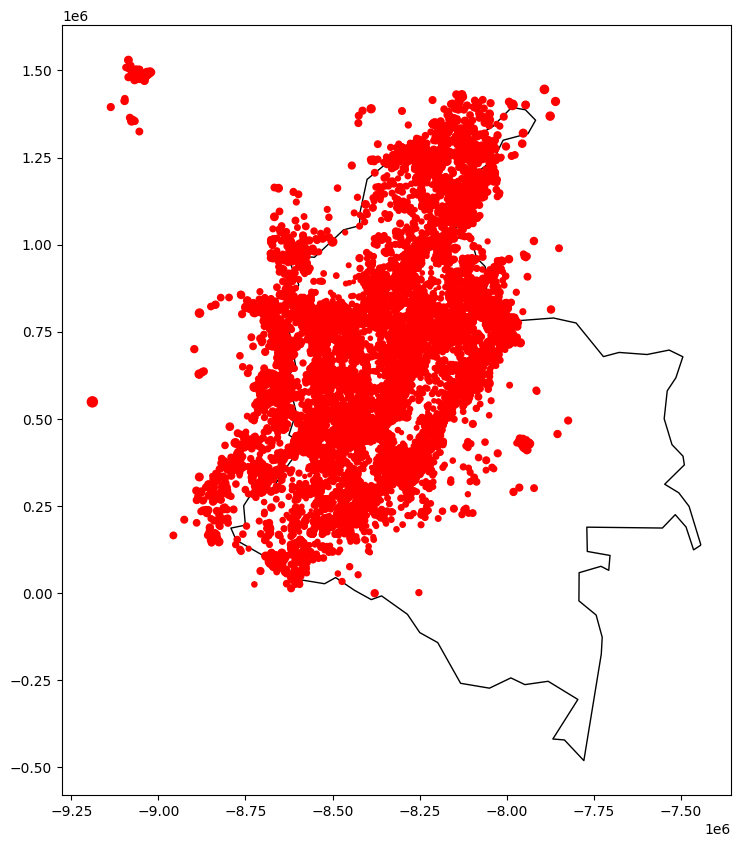

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Copiar los datos filtrados
df_sismos = data_flt.copy()

# Cargar el contorno de Colombia
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
colombia = world[world.name == "Colombia"]

# Crear un GeoDataFrame para los sismos con CRS definido (WGS84)
gdf_sismos = gpd.GeoDataFrame(
    df_sismos,
    geometry=gpd.points_from_xy(df_sismos.LONGITUD, df_sismos.LATITUD),
    crs="EPSG:4326"  # Definir el CRS como WGS84
)

# Convertir ambos GeoDataFrames a la misma proyección (Web Mercator)
colombia = colombia.to_crs(epsg=3857)
gdf_sismos = gdf_sismos.to_crs(epsg=3857)

# Graficar
fig, ax = plt.subplots(figsize=(10, 10))
colombia.plot(ax=ax, color='white', edgecolor='black')

# Añadir los sismos al mapa
gdf_sismos.plot(ax=ax, color='red', markersize=gdf_sismos['MAGNITUD'] * 10)

plt.show()


## **Algortimos de clustering**

In [ ]:
X_flt = data_flt.drop(columns=['ERROR-LAT', 'ERROR-LON', 'HORA UTC', 'EPICENTRO']).reset_index(drop=True)
reference_date = pd.Timestamp(ini_data)
X_flt['DAYS_SINCE_REFERENCE'] = (X_flt['FECHA'] - reference_date).dt.days
X_flt = X_flt.drop(columns=['FECHA'])

In [ ]:
X_flt

,LATITUD,LONGITUD,PROFUNDIDAD,MAGNITUD,RMS,GAP,ERROR-Z,DAYS_SINCE_REFERENCE
0,3.068,-75.949,-0.050,1.0,0.7,102.0,3.000000,267
1,3.806,-76.713,13.390,1.2,0.5,248.0,3.600000,182
2,4.657,-75.090,3.680,1.0,0.4,154.0,3.800000,104
3,6.838,-76.174,0.070,1.3,0.7,169.0,7.900000,212
4,1.675,-76.556,3.990,1.6,0.7,145.0,3.100000,255
...,...,...,...,...,...,...,...,...
30340,6.982,-76.475,7.422,1.7,0.4,169.3,6.594582,2007
30341,6.900,-76.254,-0.250,1.4,0.3,147.0,2.200000,2007
30342,4.363,-73.816,-4.941,0.4,0.3,138.6,4.552800,1699
30343,4.331,-73.759,8.623,0.4,0.1,177.5,2.343367,1699


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_flt)
X_stand = pd.DataFrame(scaled_data, columns=X_flt.columns)

### K-Means

In [ ]:
# Utilizar la función de KMedias de Scikit-learn
kmeans_sismos = KMeans(n_clusters = 10, random_state = 11, n_init='auto').fit(X_stand)

In [ ]:
X_flt_KMeans = X_flt.copy()
X_flt_KMeans['Cluster_KMeans'] = kmeans_sismos.fit_predict(X_stand)

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning:

invalid value encountered in sqrt



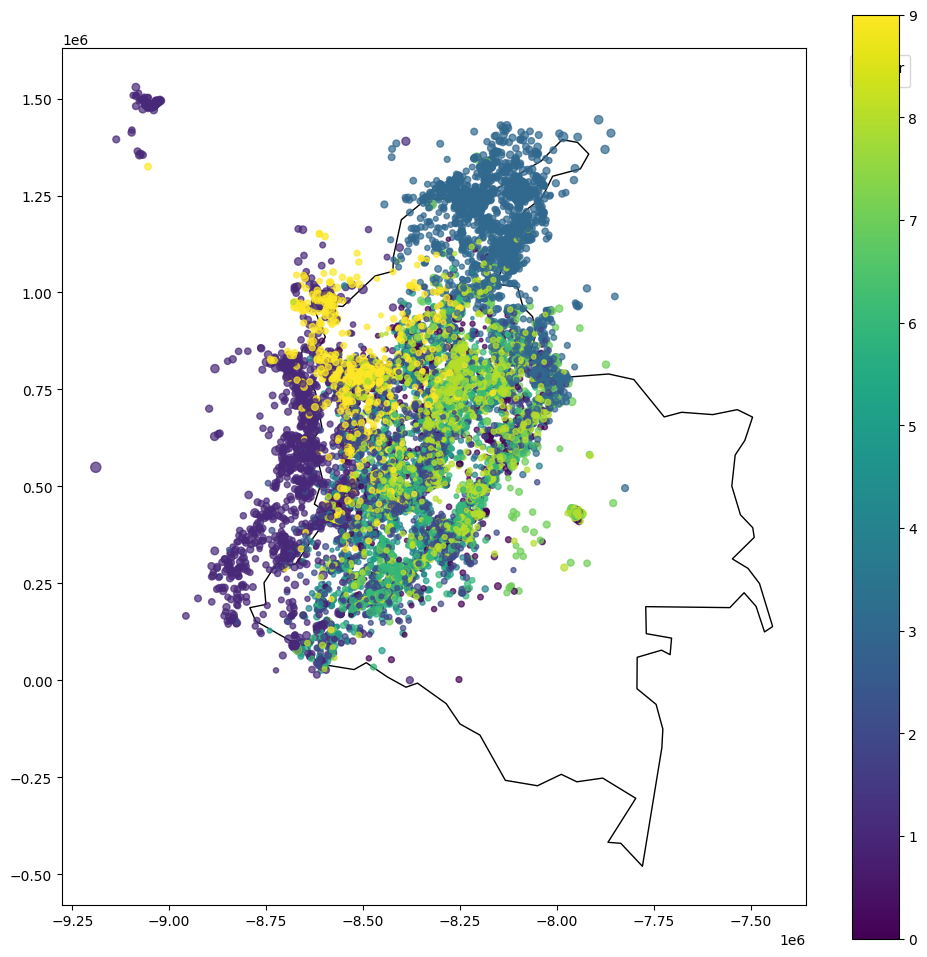

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Crear un GeoDataFrame para los sismos con CRS definido (WGS84)
gdf_sismos = gpd.GeoDataFrame(
    X_flt_KMeans,
    geometry=gpd.points_from_xy(X_flt_KMeans.LONGITUD, X_flt_KMeans.LATITUD),
    crs="EPSG:4326"  # Definir el CRS como WGS84
)

# Convertir ambos GeoDataFrames a la misma proyección (Web Mercator)
colombia = colombia.to_crs(epsg=3857)
gdf_sismos = gdf_sismos.to_crs(epsg=3857)

# Graficar
fig, ax = plt.subplots(figsize=(12, 12))
colombia.plot(ax=ax, color='white', edgecolor='black')

# Añadir los sismos al mapa con colores según el cluster
scatter = gdf_sismos.plot(
    ax=ax,
    column='Cluster_KMeans',
    cmap='viridis',
    legend=True,
    markersize=gdf_sismos['MAGNITUD'] * 10,
    alpha=0.7  # Transparencia para mejorar la visibilidad
)

# Añadir una leyenda para los clusters
handles, labels = scatter.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


### K-Medoides

In [ ]:
# Se calcula con k-meodoides
kmedoids_sismos = KMedoids(n_clusters = 6, random_state = 11).fit(X_stand)

X_flt['Cluster_KMedoids'] = kmedoids_sismos.fit_predict(X_stand)

In [ ]:
# Crear el gráfico interactivo con plotly
fig = px.scatter_3d(X_flt,
                    x='LONGITUD', y='LATITUD', z='PROFUNDIDAD',
                    color='Cluster_KMedoids',  # Colorear según el cluster asignado
                    size=abs(X_flt['MAGNITUD']) * 10,  # Tamaño según la magnitud
                    title='Clusters de Sismos',
                    color_continuous_scale='Viridis')

# Mostrar el gráfico interactivo
fig.show()